**Solution on Tree Models**

BAS 474

Charles Liu

In [1]:
lib <- library
library <- function(...){
    suppressMessages(lib(...))
}

In [2]:
library(regclass)  
library(rpart)
library(randomForest)
library(gbm)
library(caret)
library(pROC)

# Classification Partition

A partition currently contains the following individuals (class labels and the values of their predictor variables are provided). Relevant subsets of the data are as below:

Sorted on class (useful for part a)

Class | Rating |  Gender
------|--------|--------
A     | 0.2    | Male
A     | 2.4    | Female
A     | 5.7    | Male
B     | 1.8    | Female
B     | 4.8    | Female
B     | 5.7    | Male
B     | 7.9    | Male
B     | 9.2    | Female

Sorted on Rating (useful for part b)

Class | Rating |  Gender
------|--------|--------
A     | 0.2    | Male
B     | 1.8    | Female
A     | 2.4    | Female
B     | 4.8    | Female
B     | 5.7    | Male
A     | 5.7    | Male
B     | 7.9    | Male
B     | 9.2    | Female

Sorted on Gender (useful for part c)

Class | Rating |  Gender
------|--------|--------
A     | 0.2    | Male
B     | 5.7    | Male
A     | 5.7    | Male
B     | 7.9    | Male
B     | 1.8    | Female
A     | 2.4    | Female
B     | 4.8    | Female
B     | 9.2    | Female

a.  What is the Gini index of this partition?

In [3]:
pA <- 3/8  #calculate proportions of each class
pB <- 5/8
g <- 1- pA^2 - pB^2 #Gini
g

[1] 0.46875

b.  If this partition was split using the rule `Rating < 3.6` vs. `Rating >= 3.6`, what would be Gini indices of the two resulting partitions as well as the *reduction* in the Gini index when using this rule?   If the `cp` value for the tree was 0.01 (default in R), would this partition be split (assuming it's the first rule added to the model)?  In other words, is the reduction larger than `cp`?

**Response:**  The reduction works out to be 0.10208.  Since this is (much) larger than `cp`, so yes the partition could be split using this rule.

In [4]:
#Splitting Rating < 3.6 vs. Rating >= 3.6
pA <- 2/3; pB <- 1/3  #calculate proportions and Gini index of "left" partition
g1 <- 1- pA^2 - pB^2
pA <- 1/5; pB <- 4/5  #calculate proportions and Gini index of "right" partition
g2 <- 1- pA^2 - pB^2
w1 <- 3/8; w2 <- 5/8
g.rating <- w1*g1 + w2*g2  #Gini of split is weighted sum of gini inidices of resulting partitions
g.rating
g-g.rating  #reduction in Gini

[1] 0.3666667

[1] 0.1020833

c.  If this partition was split using the rule `Gender=Female` vs. `Gender=Male`, what would be the Gini indices of the two resulting partitions as well as the the *reduction* in the Gini index?   If the `cp` value for the tree was 0.01 (default in R), would this partition be split (assuming it's the first rule added to the model)?  In other words, is the reduction larger than `cp`?

**Response:**  The reduction works out to be 0.03125.  Since this is larger than `cp`, so yes the partition could be split using this rule.

In [5]:
#Splitting Male vs. Female
pA <- 2/4; pB <- 2/4  #calculate proportions and Gini index of Male partition
g1 <- 1- pA^2 - pB^2
pA <- 1/4; pB <- 3/4  #calculate proportions and Gini index of Female partition
g2 <- 1- pA^2 - pB^2
w1 <- 4/8; w2 <- 4/8
g.gender <- w1*g1 + w2*g2  #Gini of split is weighted sum of gini inidices of resulting partitions
g.gender
g-g.gender  #reduction in Gini

[1] 0.4375

[1] 0.03125

d.  Which of the two rules:  `Rating < 3.6` vs. `Rating >= 3.6` or `Gender=Female` vs. `Gender=Male` is better and why?

**Response:**  The `Rating < 3.6` vs. `Rating >= 3.6` is better because it gives the largest reduction in the Gini index.

# Regression Partition

A partition model currently contains the following individuals (y-values and the values of their predictor variables are provided).

Sorted on Rating

y      | Rating |  Gender
-------|--------|--------
8      | 0.2    | Male
4      | 1.8    | Female
5      | 2.4    | Female
16     | 4.8    | Female
12     | 5.7    | Male
11     | 5.7    | Male
11     | 7.9    | Male
13     | 9.2    | Female

Sorted on Gender

y      | Rating |  Gender
-------|--------|--------
8      | 0.2    | Male
12     | 5.7    | Male
11     | 5.7    | Male
11     | 7.9    | Male
4      | 1.8    | Female
5      | 2.4    | Female
16     | 4.8    | Female
13     | 9.2    | Female

a.  What is the SSE of this partition?

**Response:** 116

b.  If this partition was split using the rule `Rating < 3.6` vs. `Rating >= 3.6`, what would be the SSEs of each resulting partition and the *fraction reduction* in the SSE when this rule is used (the fractional reduction is the reduction in SSE divided by the SSE of the original partition)?   If the `cp` value for the tree was 0.01 (default in R), would this partition be split (assuming it's the first rule added to the model)?  

**Response:**  The fractional reduction in `SSE` works out to be about 0.78 (from 0 to 0.777), wow that's huge  Since this is (much) larger than `cp`, so yes the partition could be split using this rule.

c.  If this partition was split using the rule `Gender=Female` vs. `Gender=Male`, would would be SSEs of each resulting partition and the the *fraction reduction* in the SSE when this rule is used?   If the `cp` value for the tree was 0.01 (default in R), would this partition be split (assuming it's the first rule added to the model)?  

**Response:**  The fractional reduction in `SSE` works out to be about 0.017 (from 0 to 0.01724138).  Since this is larger than `cp`, so yes the partition could be split using this rule.

d.  Which of the two rules:  `Rating < 3.6` vs. `Rating >= 3.6` or `Gender=Female` vs. `Gender=Male` is better and why?

**Response:**  The rating rule is better because it gives the largest reduction in SSE.

In [6]:
#Calculate SSE of partition
y <- c(8,4,5,16,12,11,11,13)
x <- c(.2,1.8,2.4,4.8,5.7,5.7,7.9,9.2)
g <- c("Male","Female","Female","Female","Male","Male","Male","Female")
sum( (y-mean(y))^2 )

#Splitting x < 3.6 vs. x >= 3.6
n1 <- 3    #Get SSE of left
y.left <- y[1:3]
SSE1 <- sum( (y.left-mean(y.left))^2 )

n2 <- 5  #Get SSE of right
y.right <- y[-(1:3)]
SSE2 <- sum( (y.right-mean(y.right))^2 )

SSE.orig <- sum( (y-mean(y))^2 )
SSE.new <- SSE1+SSE2
SSE.orig-SSE.new  #reduction in SSE
(SSE.orig-SSE.new)/SSE.orig  #fractional reduction in R^2

#Splitting Male vs. Female
y.left <- y[which(g=="Male")]; n1 <- length(y.left)  
SSE1 <- sum( (y.left-mean(y.left))^2 )
y.right <- y[which(g=="Female")]; n2 <- length(y.right)
SSE2 <- sum( (y.right-mean(y.right))^2 )

SSE.orig <- sum( (y-mean(y))^2 )
SSE.new <- SSE1+SSE2
SSE.orig-SSE.new  #reduction in SSE
(SSE.orig-SSE.new)/SSE.orig  #fractional reduction

[1] 116

[1] 90.13333

[1] 0.7770115

[1] 2

[1] 0.01724138

# Classification with Trees

Load in the `CHURN` data for a classification problem where we predict whether or not a customer renews their contract with a telecommunications company (e.g., Verizon, ATT).

The column `churn` lets us know if the customer "churned" (in other words, left the company, didn't renew contract) or not.

The `churn` levels are `Yes` and `No`.

In [7]:
data(CHURN)

a.  Randomly split the data in 70% training (call it `TRAIN`) and 30% holdout (call it `HOLDOUT`).

Verify the `head` and `tail` commands.

In [8]:
set.seed(474)
train.rows <- sample(1:nrow(CHURN),0.70*nrow(CHURN))
TRAIN <- CHURN[train.rows,]
HOLDOUT <- CHURN[-train.rows,]
head(TRAIN[,1:3])
head(HOLDOUT[,1:3])

,churn,accountlength,internationalplan
,<fct>,<int>,<fct>
4950,No,154,no
3949,No,108,no
2649,No,131,no
405,No,73,no
3463,No,133,no
2479,No,123,no


,churn,accountlength,internationalplan
,<fct>,<int>,<fct>
9,No,117,no
10,No,141,yes
12,No,74,no
14,No,95,no
16,Yes,161,no
23,No,130,no


b.  Based on the distribution of classes in the training set, what will the naive model classify everyone in the holdout sample (class Yes or class No)?  What is the accuracy of the naive model on the holdout?

In [9]:
table(TRAIN$churn)  #will classify everything as 'No'
mean(TRAIN$churn=="No")  #estimated accuracy of naive model 
mean(HOLDOUT$churn=="No") #actual accuracy on the holdout


  No  Yes 
3012  488 

[1] 0.8605714

[1] 0.854

c.  Using `train`, estimate the generalization error (accuracy) of a logistic regression model from the training data (use all predictors, no interactions).  Then, make predictions on the holdout and find its actual accuracy and AUC.  Note:  `trainControl` should be set up to be tuning on accuracy, vanilla 5-fold crossvalidation.

In [10]:
fitControl <- trainControl(method="cv",number=5,classProbs=TRUE) 
set.seed(474)
GLM <- train(churn~., data=TRAIN, method="glm", trControl=fitControl, preProc=c("center","scale"))

GLM$results

mean( HOLDOUT$churn == predict(GLM,newdata=HOLDOUT) )
postResample( predict(GLM,newdata=HOLDOUT), HOLDOUT$churn )
roc(HOLDOUT$churn, predict(GLM,newdata=HOLDOUT,type="prob")$Yes)

,parameter,Accuracy,Kappa,AccuracySD,KappaSD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,none,0.8677207,0.2429164,0.01136066,0.05046288


[1] 0.8606667

Accuracy     Kappa 
0.8606667 0.2456399

Setting levels: control = No, case = Yes

Setting direction: controls < cases




Call:
roc.default(response = HOLDOUT$churn, predictor = predict(GLM,     newdata = HOLDOUT, type = "prob")$Yes)

Data: predict(GLM, newdata = HOLDOUT, type = "prob")$Yes in 1281 controls (HOLDOUT$churn No) < 219 cases (HOLDOUT$churn Yes).
Area under the curve: 0.8321

d.
Using `train` and the values of `cp` in the code below, find the best estimated generalization error/accuracy of a vanilla partition model. 
Make predictions on the holdout and find its actual accuracy and AUC.

In [11]:
#The following values of cp are a good place to start when tuning a vanilla partition model
rpartGrid <- expand.grid(cp=10^seq(from=-6,to=-1,length=30))
set.seed(474)
RPARTfit <- train(churn~.,data=TRAIN,method="rpart",tuneGrid=rpartGrid,
                                  trControl=fitControl,preProc=c("center","scale"))

RPARTfit$results[rownames( RPARTfit$bestTune ),]

mean( HOLDOUT$churn == predict(RPARTfit,newdata=HOLDOUT) )
postResample( predict(RPARTfit,newdata=HOLDOUT),  HOLDOUT$churn)
roc(HOLDOUT$churn,predict(RPARTfit,newdata=HOLDOUT,type="prob")$Yes)

,cp,Accuracy,Kappa,AccuracySD,KappaSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,0.001268961,0.946571,0.7587462,0.005773457,0.02705771


[1] 0.948

Accuracy     Kappa 
0.9480000 0.7762247

Setting levels: control = No, case = Yes

Setting direction: controls < cases




Call:
roc.default(response = HOLDOUT$churn, predictor = predict(RPARTfit,     newdata = HOLDOUT, type = "prob")$Yes)

Data: predict(RPARTfit, newdata = HOLDOUT, type = "prob")$Yes in 1281 controls (HOLDOUT$churn No) < 219 cases (HOLDOUT$churn Yes).
Area under the curve: 0.9038

e.
Fit the model using `rpart` and a `cp=0.05` (not the optimal value, but large enough so that the tree can be plotted) and use `visualize_model` to see what the tree looks like.  Consider the tenth individual in `CHURN`, i.e., `CHURN[10,]`.  By manually following the rules down the tree, what does the model predict for the probabilities of churning/not churning?  Does the model make a correct prediction for this individual?

**Prediction:**

* Is `totaldayminutes < 264`?  Yes, head to the left.
* Is `numbercustomerservicecalls<4`?  Yes, head to the left.
* Is `internationalplan=no`? No, head to the right.
* Is `totalintlcalls>=3`? Yes, head to the left.
* Is `totalintlminutes<13`? Yes, head to the left.

The prediction is `No` with 95.1% chance and 183 other individuals match this set of characteristics.
The prediction is correct!

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
,<fct>,<int>,<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
10,No,141,yes,yes,37,258.6,84,43.96,222,111,18.87,326.4,97,14.69,11.2,5,3.02,0


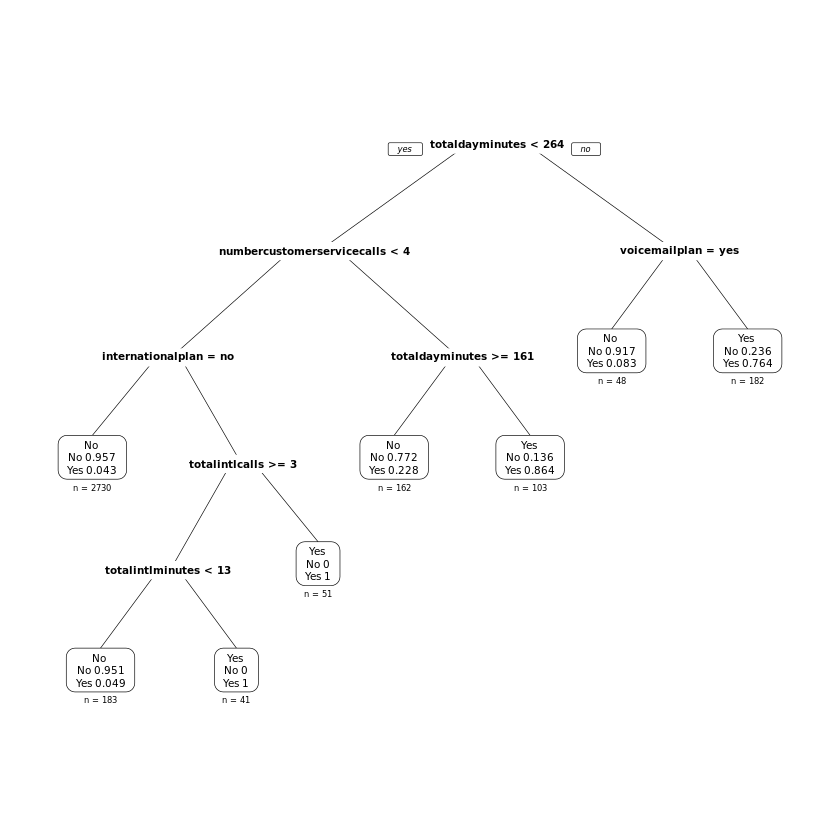

In [12]:
TREE <- rpart(churn~.,data=TRAIN,cp=0.05)
visualize_model(TREE)
CHURN[10,]

f.  Using `train` and the values of `mtry` in the code below (corresponding to 2, then the default value for this dataset of 4, then the value for pure bagging which is all predictors), find the estimated generalization error/accuracy of a random forest model.
Note: `train` will need a minute or two to finish.
Then, make predictions on the holdout and find its actual accuracy and AUC.

In [13]:
forestGrid <- expand.grid(mtry=c(2,4,17))  
set.seed(474)
FORESTfit <- train(churn~.,data=TRAIN,method="rf",tuneGrid=forestGrid,
                                   trControl=fitControl,preProc=c("center","scale"))

FORESTfit$results
FORESTfit$results[rownames( FORESTfit$bestTune ),]

mean( HOLDOUT$churn == predict(FORESTfit,newdata=HOLDOUT) )
postResample( predict(FORESTfit,newdata=HOLDOUT),  HOLDOUT$churn)
roc(HOLDOUT$churn,predict(FORESTfit,newdata=HOLDOUT,type="prob")$Yes)

,mtry,Accuracy,Kappa,AccuracySD,KappaSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,0.9414297,0.7079328,0.002637134,0.01582238
2,4,0.9528571,0.7785188,0.003030832,0.01627000
3,17,0.9525706,0.7828362,0.005296891,0.02560711


,mtry,Accuracy,Kappa,AccuracySD,KappaSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,4,0.9528571,0.7785188,0.003030832,0.01627


[1] 0.9526667

Accuracy     Kappa 
0.9526667 0.7925141

Setting levels: control = No, case = Yes

Setting direction: controls < cases




Call:
roc.default(response = HOLDOUT$churn, predictor = predict(FORESTfit,     newdata = HOLDOUT, type = "prob")$Yes)

Data: predict(FORESTfit, newdata = HOLDOUT, type = "prob")$Yes in 1281 controls (HOLDOUT$churn No) < 219 cases (HOLDOUT$churn Yes).
Area under the curve: 0.9144

g.
Comment on which model we would choose going forward and why.
Do you see indications of these models being "overfit"?
Why or why not?

**Response:**

We choose the model based on cross validation. In terms of accuracy, the one standard deviation rule suggests that the random forest models provide a valid choice.

There's no signs of overfitting since the actual accuracies on the holdout are about what was estimated. An overfit model would have an accuracy that is substantially lower on the holdout than estimated.

In [14]:
GLM$results
RPARTfit$results[rownames( RPARTfit$bestTune ),]
FORESTfit$results[rownames( FORESTfit$bestTune ),]

postResample(predict(GLM,newdata=HOLDOUT),HOLDOUT$churn)
postResample(predict(RPARTfit,newdata=HOLDOUT),HOLDOUT$churn)
postResample(predict(FORESTfit,newdata=HOLDOUT),HOLDOUT$churn)

,parameter,Accuracy,Kappa,AccuracySD,KappaSD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,none,0.8677207,0.2429164,0.01136066,0.05046288


,cp,Accuracy,Kappa,AccuracySD,KappaSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,0.001268961,0.946571,0.7587462,0.005773457,0.02705771


,mtry,Accuracy,Kappa,AccuracySD,KappaSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,4,0.9528571,0.7785188,0.003030832,0.01627


Accuracy     Kappa 
0.8606667 0.2456399

Accuracy     Kappa 
0.9480000 0.7762247

Accuracy     Kappa 
0.9526667 0.7925141

# GBM and XGBoost Illustration

For GBM and XGBoost, it is a lot of work to get a "good" model.  Let's try with the `CHURN` dataset and set it up so that 5-fold cross-validation will be used to estimate generalization errors, and the AUC will be of interest.

In [15]:
fitControl <- trainControl(method = "cv", number = 5,
                           classProbs = TRUE, summaryFunction = twoClassSummary, verboseIter = FALSE)

Using `train` and the values of boosted tree parameters in the code below, find the estimated generalization error/accuracy of a vanilla boosted tree. How many models are considered there?

Then, make predictions on the holdout and find its actual accuracy.

Note 1:  make sure to add `verbose=FALSE` to the `train` command or be buried in output!

Note 2:  `train` may need a minute or two to finish.

In [16]:
gbmGrid <- expand.grid(n.trees=c(500,1000),interaction.depth=4:5,shrinkage=c(.001,.01),n.minobsinnode=10)
set.seed(474)
GBM <- train(churn~.,data=TRAIN,method="gbm",tuneGrid=gbmGrid,verbose=FALSE,
                                trControl=fitControl,preProc=c("center","scale"))

GBM$results[order(GBM$results$ROC,decreasing=TRUE),]

postResample(predict(GBM,newdata=HOLDOUT),HOLDOUT$churn)

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”


,shrinkage,interaction.depth,n.minobsinnode,n.trees,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,0.010,4,10,500,0.9213365,0.9923665,0.6742058,0.02025138,0.0051888080,0.03544833
6,0.010,4,10,1000,0.9212993,0.9893792,0.7275615,0.01850357,0.0051862123,0.03492796
8,0.010,5,10,1000,0.9211759,0.9897104,0.7357458,0.01732349,0.0035886643,0.03494083
7,0.010,5,10,500,0.9206923,0.9923665,0.6885756,0.01985998,0.0051888080,0.04207439
4,0.001,5,10,1000,0.9010685,0.9980100,0.2972438,0.01106176,0.0029665910,0.07659595
2,0.001,4,10,1000,0.8896518,0.9996683,0.1762255,0.01740840,0.0007416478,0.02843888
3,0.001,5,10,500,0.8858774,1.0000000,0.0000000,0.01518234,0.0000000000,0.00000000
1,0.001,4,10,500,0.8812538,1.0000000,0.0000000,0.01494906,0.0000000000,0.00000000


Accuracy     Kappa 
0.9393333 0.7189484

For XGBoost, try the parameters given below and remember `set.seed(474)` immediately before `train`.

**Expect the training to take a LONG time ...**

In [17]:
xgboostGrid <- expand.grid(eta=0.01,nrounds=c(100,200,500),
                           max_depth=c(5, 7),min_child_weight=1,gamma=c(0, 1, 10),colsample_bytree=1,subsample=0.8)
set.seed(474)
XTREME <- train(churn~.,data=TRAIN,method="xgbTree",tuneGrid=xgboostGrid,metric="ROC",
                                trControl=fitControl,verbose=FALSE)

XTREME$results[order(XTREME$results$ROC,decreasing=TRUE),]

postResample(predict(XTREME,newdata=HOLDOUT),HOLDOUT$churn)

,eta,max_depth,gamma,colsample_bytree,min_child_weight,subsample,nrounds,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,0.01,5,1,1,1,0.8,500,0.9265708,0.9933599,0.7295603,0.01633504,0.002625613,0.025954228
3,0.01,5,0,1,1,0.8,500,0.9264400,0.9930271,0.7315801,0.01757621,0.004300901,0.017789384
12,0.01,7,0,1,1,0.8,500,0.9253710,0.9936916,0.7438881,0.01516199,0.003600486,0.025574012
15,0.01,7,1,1,1,0.8,500,0.9248504,0.9943560,0.7336419,0.01575669,0.003015626,0.025556200
18,0.01,7,10,1,1,0.8,500,0.9227653,0.9923649,0.6722281,0.01734850,0.004780320,0.036464466
5,0.01,5,1,1,1,0.8,200,0.9220038,0.9916999,0.7029245,0.01627622,0.003319514,0.029962788
9,0.01,5,10,1,1,0.8,500,0.9219451,0.9920332,0.6722281,0.01705913,0.005298242,0.037171480
2,0.01,5,0,1,1,0.8,200,0.9216422,0.9910354,0.7111298,0.01799808,0.003443273,0.031980840
11,0.01,7,0,1,1,0.8,200,0.9183337,0.9923632,0.7192931,0.01446130,0.004782519,0.020608974


Accuracy    Kappa 
0.958000 0.817404

Note: normally, MUCH more tuning of parameters is performed (and with a much higher number of trees); I've just narrowed it down to some reasonable values in the interest of time. You can explore more choices of parameters to achieve even better performance.